# Tri par insertion

## fonction `place`

Programmer la fonction
```
fonction place(lst : liste, i : entier):
    tant que i > 0 et que lst[i-1] > lst[i]:
        echange lst[i] et lst[i-1]
        i = i - 1
```

In [1]:
def place(lst : list, i : int) -> None:
    while i>0 and lst[i]< lst[i-1]:
        lst[i], lst[i-1] = lst[i-1], lst[i]
        i -= 1

Exécute la cellule de test suivante : elle ne doit pas produire d'erreur.

In [2]:
place([1,4,2],2)

Exécute la cellule de test suivante pour vérifier que `place` fait bien ce qu'il faut.

In [3]:
from random import randint

L1 = [randint(1,1000) for _ in range(10)]
L1.sort()
L1.extend([randint(1,1000) for _ in range(10)])
L2 = L1[:11]
L2.sort()
place(L1,10)
if L1[:11]==L2:
    print("Tout est OK, tu peux continuer.")
else:
    print("Il y a un problème dans la fonction.")


Tout est OK, tu peux continuer.


## fonction `tri_insertion`

Programmer la fonction
```
fonction tri_insertion( lst : liste): 
    n = longueur(lst)
    pour i allant de 1 à n-1:
        place(lst,i)
```

In [4]:
def tri_insertion(lst: list) -> None:
    n = len(lst)
    for i in range(1,n):
        place(lst,i)


Exécute la cellule suivante pour repérer les éventuelles erreurs de syntaxe.

In [6]:
tri_insertion([21,584,231,6,51,321,3546,32135,16851,3213,2])

Exécute la cellule de test suivante pour vérifier que `tri_selection` fait bien ce qu'il faut.

In [7]:
L1 = [randint(0,100) for _ in range(10)]
print('Je choisis la liste \t\t',L1)
L2 = L1[:]
L2.sort()
print('En la triant on doit obtenir\t',L2)
tri_insertion(L1)
print('Avec ta fonction on obtient\t',L1)
t = False
for (x,y) in zip(L1,L2):
    if x !=y:
        t = True
if t:
    print('Ta fonction est mal codée.')
else:
    print('Tout est OK, tu peux continuer.')

Je choisis la liste 		 [64, 83, 69, 48, 34, 86, 31, 72, 72, 83]
En la triant on doit obtenir	 [31, 34, 48, 64, 69, 72, 72, 83, 83, 86]
Avec ta fonction on obtient	 [31, 34, 48, 64, 69, 72, 72, 83, 83, 86]
Tout est OK, tu peux continuer.


# Complexité

tu vas maintenant rajouter une variable globale `opel` dans les 2 fonctions précédentes, que tu vas recopier ci dessous.
Tu l'augmenteras de 1 à chaque accès à `lst` en lecture/écriture, de 2 s'il y a un échange.

**Ce procédé nous permet de mesurer le nombre d'opels *réel* pour trier une liste donnée, pas la complexité pire cas.**

Commençons par la fonction `place`

In [8]:
nb_opel = 0
def place(lst : list, i : int) -> None:
    global nb_opel
    while i>0 and lst[i]< lst[i-1]:
        nb_opel +=4
        lst[i], lst[i-1] = lst[i-1], lst[i]
        i -= 1

Exécute la cellule de tests suivante.

In [9]:
nb_opel = 0
L = [21,58,231,426,551,621,3546,32135,116851,2223213,2]
place(L,10)
if nb_opel ==40:
    print("Tout est OK tu peux continuer.")
else:
    print("Il semble y avoir un problème.")

Tout est OK tu peux continuer.


Pourquoi n'est-ce pas nécessaire de faire la même chose pour`tri_insertion` ?

## Illustration des résultats

Contraireement au résultat du cours, `nb_opel` n'est pas toujours automatiquement augmenté : on va obtenir des résultats *effectifs* et non des résultats *pire cas*.

Exécute la cellule suivante.

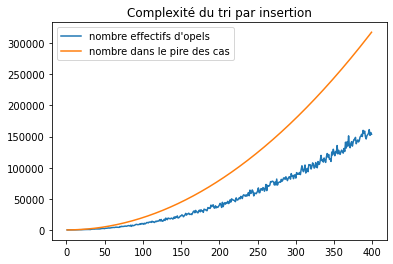

In [12]:
import matplotlib.pyplot as plt

X = []
Y = []
Z = []
for i in range(1,400):
    L = [randint(1,10000) for _ in range(i)]
    nb_opel = 0
    tri_insertion(L)
    X.append(i)
    Y.append(nb_opel)
    Z.append(2*i**2-2*i)
plt.plot(X,Y,label = "nombre effectifs d'opels")
plt.plot(X,Z,label = "nombre dans le pire des cas")
plt.title("Complexité du tri par insertion")
plt.legend()
plt.show()

Comme on peut le voir, la complexité réelle semble bien de l'ordre de $n^2$.
On peut essayer de déterminer "à la main" le coefficient $a$ tel que la courbe bleu se rapproche le plus de la courbe de la fonction définie sur $\mathbb{N}^*$ par $$n\mapsto an^2$$
Il suffit d'essayer successivement des valeurs de $a$ :

Entrer une valeur de a : 1


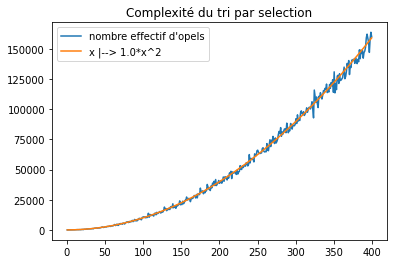

In [14]:
X = []
Y = []
Z = []
a = float(input("Entrer une valeur de a : "))
for i in range(1,400):
    L = [randint(1,10000) for _ in range(i)]
    nb_opel = 0
    tri_insertion(L)
    X.append(i)
    Y.append(nb_opel)
    Z.append(a*i**2)
plt.plot(X,Y,label = "nombre effectif d'opels")
plt.plot(X,Z,label = "x |--> "+str(a)+"*x^2")
plt.title("Complexité du tri par selection")
plt.legend()
plt.show()

Si on se réfère aux résultats que tu as trouvés, pour une liste de taille 100000, combien faut-il d'opels environ pour la trier avec le tri par selection ?

In [ ]:
100000